In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

## 데이터 형태
    - 연/월간 지역,연령대별 평균 값으로 데이터 구성됨.
    - pop_cd로 고객 군을 형성 
        - 지역과 나이를 pop_cd로 특정지을 수 있음

In [2]:
df_credit = pd.read_csv('credit_card_data.csv')
df_credit.head()

,pop_cd,year,month,avg_score,avg_rat,city,sex,ages,population,num_opencard,...,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment
0,L011,2016,1,812,2,서울,NaN,10대,55000,1.44,...,0,0,0,1120000,8210000,78020000,92170000,87260000,0,0
1,L011,2016,2,773,4,서울,NaN,10대,380000,1.71,...,510000,220000,1020000,680000,4660000,23300000,8260000,42410000,4000,1000
2,L011,2016,3,771,4,서울,NaN,10대,387000,1.75,...,490000,210000,1140000,640000,4370000,22930000,8300000,41710000,3000,1000
3,L011,2016,4,770,4,서울,NaN,10대,412000,1.76,...,510000,240000,1340000,510000,4770000,22160000,9460000,41040000,4000,1000
4,L011,2016,5,771,4,서울,NaN,10대,414000,1.75,...,490000,340000,1490000,640000,4740000,21960000,9660000,40850000,3000,1000


In [3]:
df_credit.columns

Index(['pop_cd', 'year', 'month', 'avg_score', 'avg_rat', 'city', 'sex',
       'ages', 'population', 'num_opencard', 'num_usecard',
       'monthly_card_spend', 'monthly_lc', 'monthly_loan', 'monthly_bk_loan',
       'monthly_cd_loan', 'monthly_installments_loan',
       'monthly_insurance_loan', 'monthly_sbk_loan', 'loan_commitment',
       'inst_rep_loanb', 'ls_rep_loanb', 'credit_loan', 'mortgage_loan',
       'credit_card_payment', 'credit_card_installments_payment'],
      dtype='object')

In [4]:
a = ['monthly_card_spend', 'monthly_lc',
       'monthly_loan', 'monthly_bk_loan', 'monthly_cd_loan',
       'monthly_installments_loan', 'monthly_insurance_loan',
       'monthly_sbk_loan', 'loan_commitment', 'inst_rep_loanb', 'ls_rep_loanb',
       'credit_loan', 'mortgage_loan', 'credit_card_payment',
       'credit_card_installments_payment', 'year_month']
a

['monthly_card_spend',
 'monthly_lc',
 'monthly_loan',
 'monthly_bk_loan',
 'monthly_cd_loan',
 'monthly_installments_loan',
 'monthly_insurance_loan',
 'monthly_sbk_loan',
 'loan_commitment',
 'inst_rep_loanb',
 'ls_rep_loanb',
 'credit_loan',
 'mortgage_loan',
 'credit_card_payment',
 'credit_card_installments_payment',
 'year_month']

## 전처리
- NA값 채우기 
    - city na값 : '전국'
    - sex na값 : '전체'
- ages : int로 바꿈
    - '10대' -> 10
- 연,월 합치기 -> year_month
- 단위 바꾸기 
    - 10,000으로 나누어주기
    
## 새로운 column 생성
- card_usage_ratio = num_usecard / num_opencard
    - 새로 만든 카드 중 직접 사용한 카드 수

In [5]:
# na값 확인
df_credit.isna().sum() 

pop_cd                                 0
year                                   0
month                                  0
avg_score                              0
avg_rat                                0
city                                 432
sex                                 3456
ages                                   0
population                             0
num_opencard                           0
num_usecard                            0
monthly_card_spend                     0
monthly_lc                             0
monthly_loan                           0
monthly_bk_loan                        0
monthly_cd_loan                        0
monthly_installments_loan              0
monthly_insurance_loan                 0
monthly_sbk_loan                       0
loan_commitment                        0
inst_rep_loanb                         0
ls_rep_loanb                           0
credit_loan                            0
mortgage_loan                          0
credit_card_paym

In [6]:
df_credit['city'] = df_credit['city'].fillna('전국')
df_credit['sex'] = df_credit['sex'].fillna('전체')
df_credit['ages'] = df_credit['ages'].apply(lambda x:int(x[:-1])).astype(int)
df_credit['year_month'] = pd.to_datetime((df_credit.year * 100 + df_credit.month).apply(str), format="%Y%m")
df_credit.drop(['year', 'month'], axis=1, inplace=True)

In [7]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 25 columns):
pop_cd                              3888 non-null object
avg_score                           3888 non-null int64
avg_rat                             3888 non-null int64
city                                3888 non-null object
sex                                 3888 non-null object
ages                                3888 non-null int64
population                          3888 non-null int64
num_opencard                        3888 non-null float64
num_usecard                         3888 non-null float64
monthly_card_spend                  3888 non-null int64
monthly_lc                          3888 non-null int64
monthly_loan                        3888 non-null int64
monthly_bk_loan                     3888 non-null int64
monthly_cd_loan                     3888 non-null int64
monthly_installments_loan           3888 non-null int64
monthly_insurance_loan              3888 non-n

In [8]:
divide_100_col = ['monthly_card_spend',
 'monthly_lc',
 'monthly_loan',
 'monthly_bk_loan',
 'monthly_cd_loan',
 'monthly_installments_loan',
 'monthly_insurance_loan',
 'monthly_sbk_loan',
 'loan_commitment',
 'inst_rep_loanb',
 'ls_rep_loanb',
 'credit_loan',
 'mortgage_loan',
 'credit_card_payment',
 'credit_card_installments_payment',
]

In [9]:
for col in divide_100_col:
    df_credit[col] = df_credit[col] / 10000

In [10]:
df_credit['card_usage_ratio'] = df_credit['num_usecard'] / df_credit['num_opencard']

## EDA

In [11]:
def box_plot(x, y, hue, data, x_label, y_label, title, figsize=(11, 9)):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.boxplot(x=x, y=y, hue=hue, data=data)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize=15)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    #ax.xaxis.set_label_coords(1.05, -0.025)
    plt.title(title, fontsize=25, y=1.05)
    if hue != None:
        plt.legend(fontsize=15)

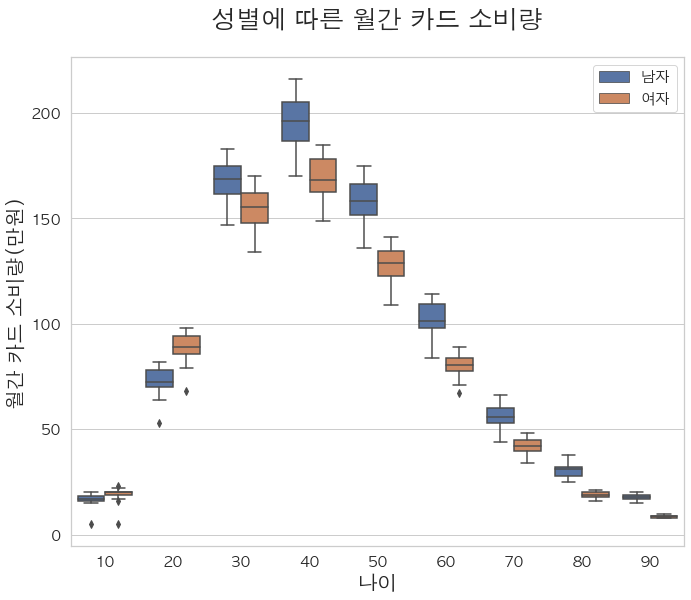

In [12]:
box_plot('ages', 'monthly_card_spend', hue='sex', 
         data = df_credit[(df_credit.sex =='남자') | (df_credit.sex=='여자')],
         x_label = '나이', y_label='월간 카드 소비량(만원)',
         title= '성별에 따른 월간 카드 소비량')

- 연령별 월간 카드 소비량을 보면 20대-30대-40대 동안 급격한 우상향을 보임.
- 40대 이후로 소비량이 점차 감소함.
- 20대를 제외한 나머지 연령대에서 남자의 카드 소비량이 더 많음.
- 요약
    - 20대 여성의 카드 소비량이 남성보다 많음.
    - 20대에서 30대의 카드 소비량 증가폭이 매우 큼.

In [13]:
df_credit.columns

Index(['pop_cd', 'avg_score', 'avg_rat', 'city', 'sex', 'ages', 'population',
       'num_opencard', 'num_usecard', 'monthly_card_spend', 'monthly_lc',
       'monthly_loan', 'monthly_bk_loan', 'monthly_cd_loan',
       'monthly_installments_loan', 'monthly_insurance_loan',
       'monthly_sbk_loan', 'loan_commitment', 'inst_rep_loanb', 'ls_rep_loanb',
       'credit_loan', 'mortgage_loan', 'credit_card_payment',
       'credit_card_installments_payment', 'year_month', 'card_usage_ratio'],
      dtype='object')

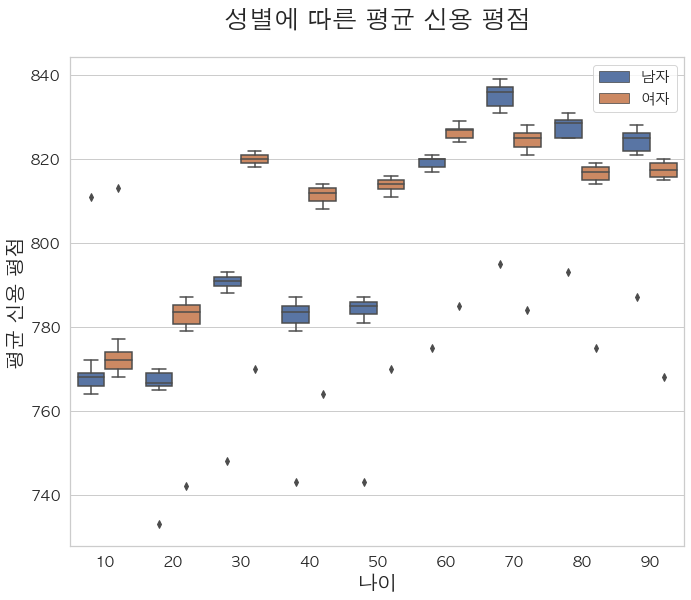

In [14]:
box_plot(x='ages', y='avg_score', hue='sex', 
         data = df_credit[(df_credit.sex =='남자') | (df_credit.sex=='여자')],
         x_label = '나이', y_label='평균 신용 평점',
         title= '성별에 따른 평균 신용 평점')

- 전체적으로 우상향. 
- 여성의 경우 20대-30대로 연령이 바뀌면서 평균 신용등급 증가폭이 크게 나타남.
- 남성의 경우 50대-60대로 연령이 바뀔 때 평균 신용등급이 증가. 

In [15]:
df_credit.columns

Index(['pop_cd', 'avg_score', 'avg_rat', 'city', 'sex', 'ages', 'population',
       'num_opencard', 'num_usecard', 'monthly_card_spend', 'monthly_lc',
       'monthly_loan', 'monthly_bk_loan', 'monthly_cd_loan',
       'monthly_installments_loan', 'monthly_insurance_loan',
       'monthly_sbk_loan', 'loan_commitment', 'inst_rep_loanb', 'ls_rep_loanb',
       'credit_loan', 'mortgage_loan', 'credit_card_payment',
       'credit_card_installments_payment', 'year_month', 'card_usage_ratio'],
      dtype='object')

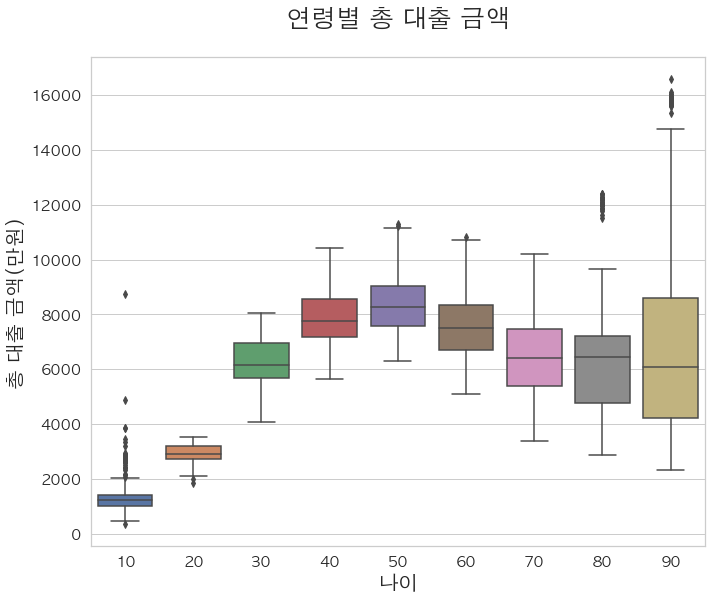

In [16]:
box_plot(x='ages', y='monthly_loan', hue=None, 
         data = df_credit,
         x_label = '나이', y_label='총 대출 금액(만원)',
         title= '연령별 총 대출 금액')

## 연령별 대출 비율 시각화

In [17]:
loan_cols = ['monthly_bk_loan', 'monthly_cd_loan', 'monthly_installments_loan', 'monthly_insurance_loan', 'monthly_sbk_loan']

In [18]:
df_loan_ratio = pd.DataFrame()
for col in loan_cols:
    tmp = pd.DataFrame()
    
    colname = col.split('monthly_')[1]+'_ratio'
    df_loan_ratio[colname] = df_credit[col] / df_credit['monthly_loan']
df_loan_ratio['ages'] = df_credit['ages']
df_loan_ratio.head()

,bk_loan_ratio,cd_loan_ratio,installments_loan_ratio,insurance_loan_ratio,sbk_loan_ratio,ages
0,0.982141,0.000000,0.000000,0.000000,0.000000,10
1,0.894154,0.006572,0.017641,0.007610,0.035282,10
2,0.891057,0.006033,0.017388,0.007452,0.040454,10
3,0.888849,0.006857,0.018405,0.008661,0.048358,10
4,0.883056,0.007603,0.017741,0.012310,0.053946,10


In [19]:
df_melt_loan = pd.melt(df_loan_ratio, id_vars=['ages'])
df_melt_loan.head()

,ages,variable,value
0,10,bk_loan_ratio,0.982141
1,10,bk_loan_ratio,0.894154
2,10,bk_loan_ratio,0.891057
3,10,bk_loan_ratio,0.888849
4,10,bk_loan_ratio,0.883056


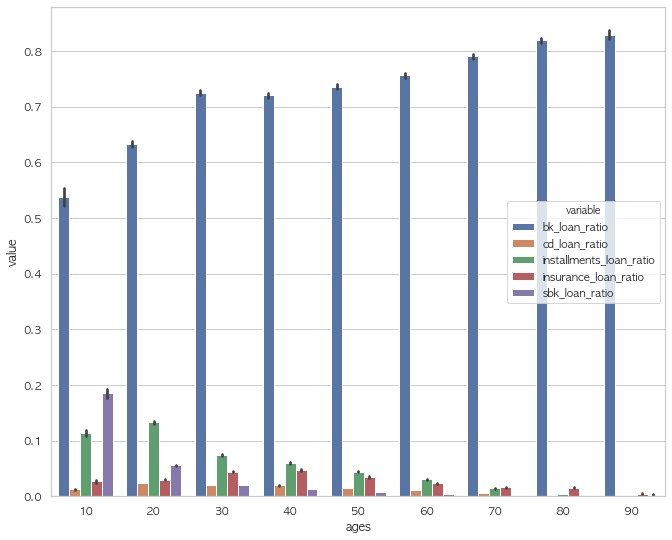

In [20]:
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x='ages', y='value', hue='variable', data=df_melt_loan)

- 전체적으로 은행 대출 비율은 연령이 높아질수록 같이 높아짐.
- 은행 대출 비율이 압도적으로 높아 이를 제외하고 나머지 대출 비율을 시각화.

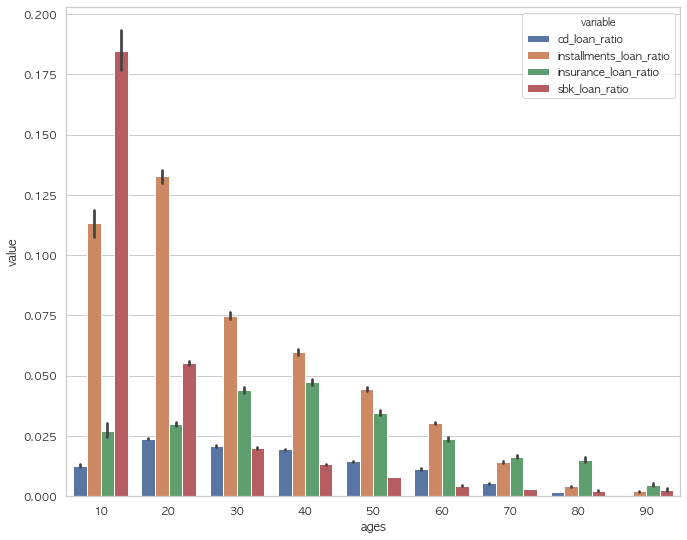

In [21]:
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x='ages', y='value', hue='variable', data=df_melt_loan[df_melt_loan.variable != 'bk_loan_ratio'])

## 카드 관련 feature와 대출 시각화

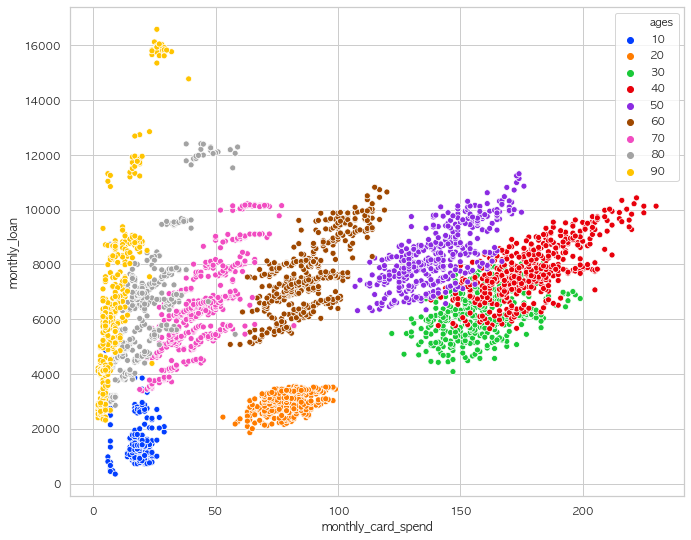

In [22]:
f, ax = plt.subplots(figsize=(11, 9))
palette = sns.color_palette("bright", 9)
hue_order = [i for i in range(10, 100, 10)]
sns.scatterplot(x='monthly_card_spend', y='monthly_loan', hue='ages', palette=palette, data=df_credit, legend='full')

- 월간 카드 소비와 월간 대출액을 시각화. 연령별로 모여있음. 하지만 연령대가 높아질수록 분산이 큼.

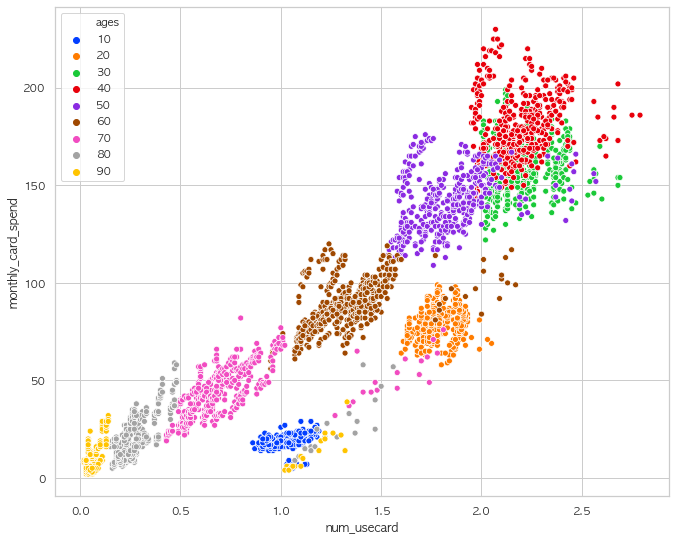

In [23]:
f, ax = plt.subplots(figsize=(11, 9))
palette = sns.color_palette("bright", 9)
hue_order = [i for i in range(10, 100, 10)]
sns.scatterplot(x='num_usecard', y='monthly_card_spend', hue='ages', palette=palette, data= df_credit, legend='full')

- 사용하는 카드 개수와 카드 소비량을 시각화. 연령대로 모여 있고, 30대-40대의 소비가 매우 활발함을 보임.

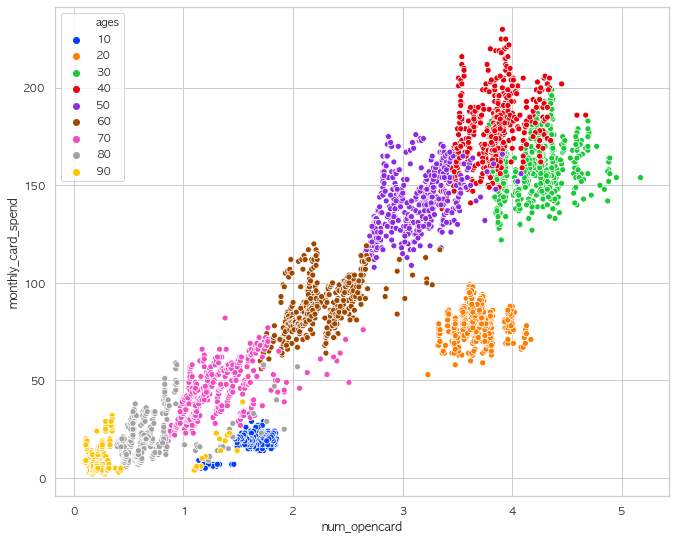

In [24]:
f, ax = plt.subplots(figsize=(11, 9))
palette = sns.color_palette("bright", 9)
hue_order = [i for i in range(10, 100, 10)]
sns.scatterplot(x='num_opencard', y='monthly_card_spend', hue='ages', palette=palette, data= df_credit, legend='full')

- 카드 발급 개수와 카드 소비량을 시각화. 
- 20대에서 30대로 넘어갈 때 카드 발급 수가 증가하고, 30-40대에서 최고점에 도달한 뒤, 연령이 높아짐에 따라 감소하는 추세를 보임.

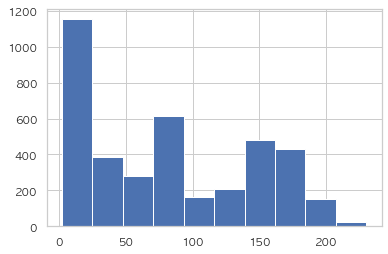

In [40]:
df_credit.monthly_card_spend.hist()

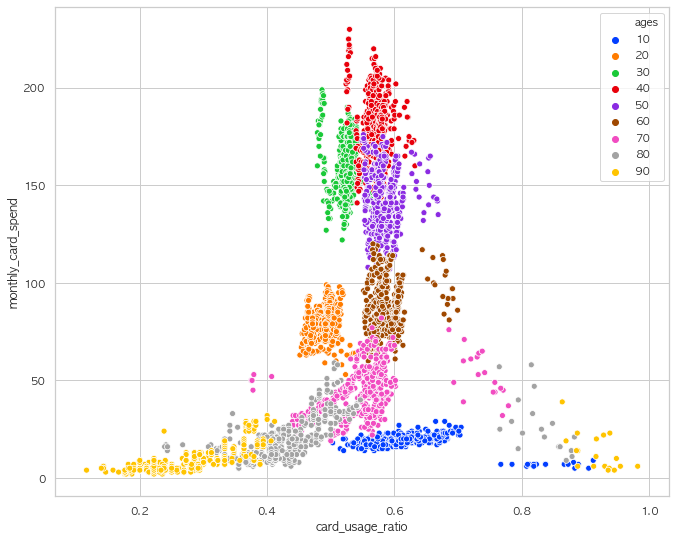

In [45]:
f, ax = plt.subplots(figsize=(11, 9))
palette = sns.color_palette("bright", 9)
sns.scatterplot(x='card_usage_ratio', y='monthly_card_spend', hue='ages', palette=palette, data= df_credit, legend='full')


- 'num_usecard', 'num_opencard'는 20대부터 30대-40대 우상항, 그 후로 감소하는 패턴을 볼 수 있음.
- 위 두 feature로부터 생성한 실제 카드 사용 비율을 나타내는 card_usage_ratio를 만들어 시각화함.
- 실제 카드 사용하는 비율과 월간 카드 사용량을 시각화했을 때 연령별로 군집화되어있음을 보임.
    - 특히 20대가 잘 모여있고, 실제 카드 사용하는 비율이 같을 때 40대의 월간 카드 소비량이 가장 많았음.
    - 30대, 40대의 소비활동이 가장 활발함을 보임. 
    - 그 이후 연령대는 군집이 되어 있지만, 이탈한 point도 많음.
    

### 상관관계 분석
- 서로 연관되어있는 지표 찾아봄. -> 추후 모델 학습 때 서로 상관성있는 feature들을 저차원 압축/제거.
- loan 변수들끼리 상관관계 있을 것으로 예상. -> 저차원 PCA에서 시각화해봄.
- monthly_card_spend와 credit_card_payment, credit_card_installments_payment 상관관계 있을 것 같음.
- 기타 상관관계를 정렬해서 높은 변수 pair, 낮은 변수 pair를 분석

In [26]:
df_credit.columns

Index(['pop_cd', 'avg_score', 'avg_rat', 'city', 'sex', 'ages', 'population',
       'num_opencard', 'num_usecard', 'monthly_card_spend', 'monthly_lc',
       'monthly_loan', 'monthly_bk_loan', 'monthly_cd_loan',
       'monthly_installments_loan', 'monthly_insurance_loan',
       'monthly_sbk_loan', 'loan_commitment', 'inst_rep_loanb', 'ls_rep_loanb',
       'credit_loan', 'mortgage_loan', 'credit_card_payment',
       'credit_card_installments_payment', 'year_month', 'card_usage_ratio'],
      dtype='object')

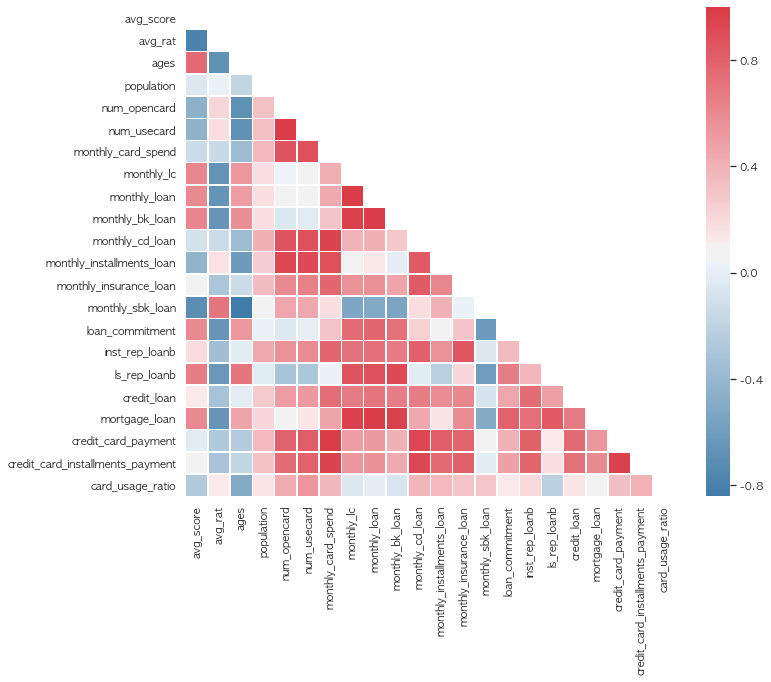

In [27]:
corr = df_credit.corr()
# 입력된 array의 shape 값을 False로하는 numpy array
mask = np.zeros_like(corr, dtype=np.bool)
# np.triu_indices_from(numpy array) : upper triangle index 반환
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
# 색깔 custom. red -> 양의 상관관계, blue -> 음의 상관관계
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, square=True, linewidths=.5, mask = mask, cmap = cmap)

- loan(대출) 관련 column들이 매우 강하게 양의 상관성이 있음.
    - 아마 monthly_loan = 다른 여러 대출지표들의 합이기 때문일것이라 예상.
    - 만약 모델을 학습한다면, monthly_loan 지표를 대표값으로 사용하거나, feature extraction(PCA 등)기법을 사용.

In [28]:
sorted_corr_total = corr.unstack().drop_duplicates().sort_values(ascending=False)[1:]
display(sorted_corr_total[:5])
display(sorted_corr_total[-5:])
print("")

monthly_lc          monthly_loan           0.986415
monthly_card_spend  credit_card_payment    0.985854
monthly_loan        mortgage_loan          0.985699
num_opencard        num_usecard            0.983744
monthly_loan        monthly_bk_loan        0.980280
dtype: float64

ages       num_usecard        -0.679487
           num_opencard       -0.688015
avg_score  monthly_sbk_loan   -0.701963
           avg_rat            -0.786341
ages       monthly_sbk_loan   -0.841758
dtype: float64

In [29]:
df_credit[df_credit.columns]

,pop_cd,avg_score,avg_rat,city,sex,ages,population,num_opencard,num_usecard,monthly_card_spend,...,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment,year_month,card_usage_ratio
0,L011,812,2,서울,전체,10,55000,1.44,1.13,7.0,...,0.0,112.0,821.0,7802.0,9217.0,8726.0,0.0,0.0,2016-01-01,0.784722
1,L011,773,4,서울,전체,10,380000,1.71,0.96,17.0,...,102.0,68.0,466.0,2330.0,826.0,4241.0,0.4,0.1,2016-02-01,0.561404
2,L011,771,4,서울,전체,10,387000,1.75,0.95,19.0,...,114.0,64.0,437.0,2293.0,830.0,4171.0,0.3,0.1,2016-03-01,0.542857
3,L011,770,4,서울,전체,10,412000,1.76,0.92,20.0,...,134.0,51.0,477.0,2216.0,946.0,4104.0,0.4,0.1,2016-04-01,0.522727
4,L011,771,4,서울,전체,10,414000,1.75,0.94,17.0,...,149.0,64.0,474.0,2196.0,966.0,4085.0,0.3,0.1,2016-05-01,0.537143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,Y95,819,3,전국,여자,90,232000,0.11,0.03,9.0,...,45.0,729.0,2134.0,5790.0,2613.0,9859.0,3.6,1.1,2017-08-01,0.272727
3884,Y95,819,3,전국,여자,90,235000,0.11,0.03,9.0,...,43.0,711.0,2171.0,5791.0,3036.0,9911.0,3.6,0.8,2017-09-01,0.272727
3885,Y95,819,3,전국,여자,90,239000,0.11,0.03,9.0,...,45.0,695.0,2172.0,5737.0,3247.0,9834.0,3.6,1.2,2017-10-01,0.272727
3886,Y95,819,3,전국,여자,90,243000,0.11,0.03,9.0,...,58.0,685.0,2170.0,5730.0,3348.0,9752.0,3.2,1.1,2017-11-01,0.272727


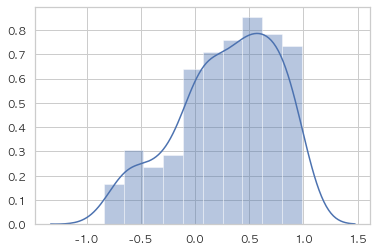

In [30]:
sns.distplot(sorted_corr_total.values, bins=10)

- 위의 그림은 correlation value에 대한 분포를 나타냄.
- 전체적으로 양의 상관관계를 가지는 feature들이 많음.
- 이상적인 correlation value는 아래와 같음.

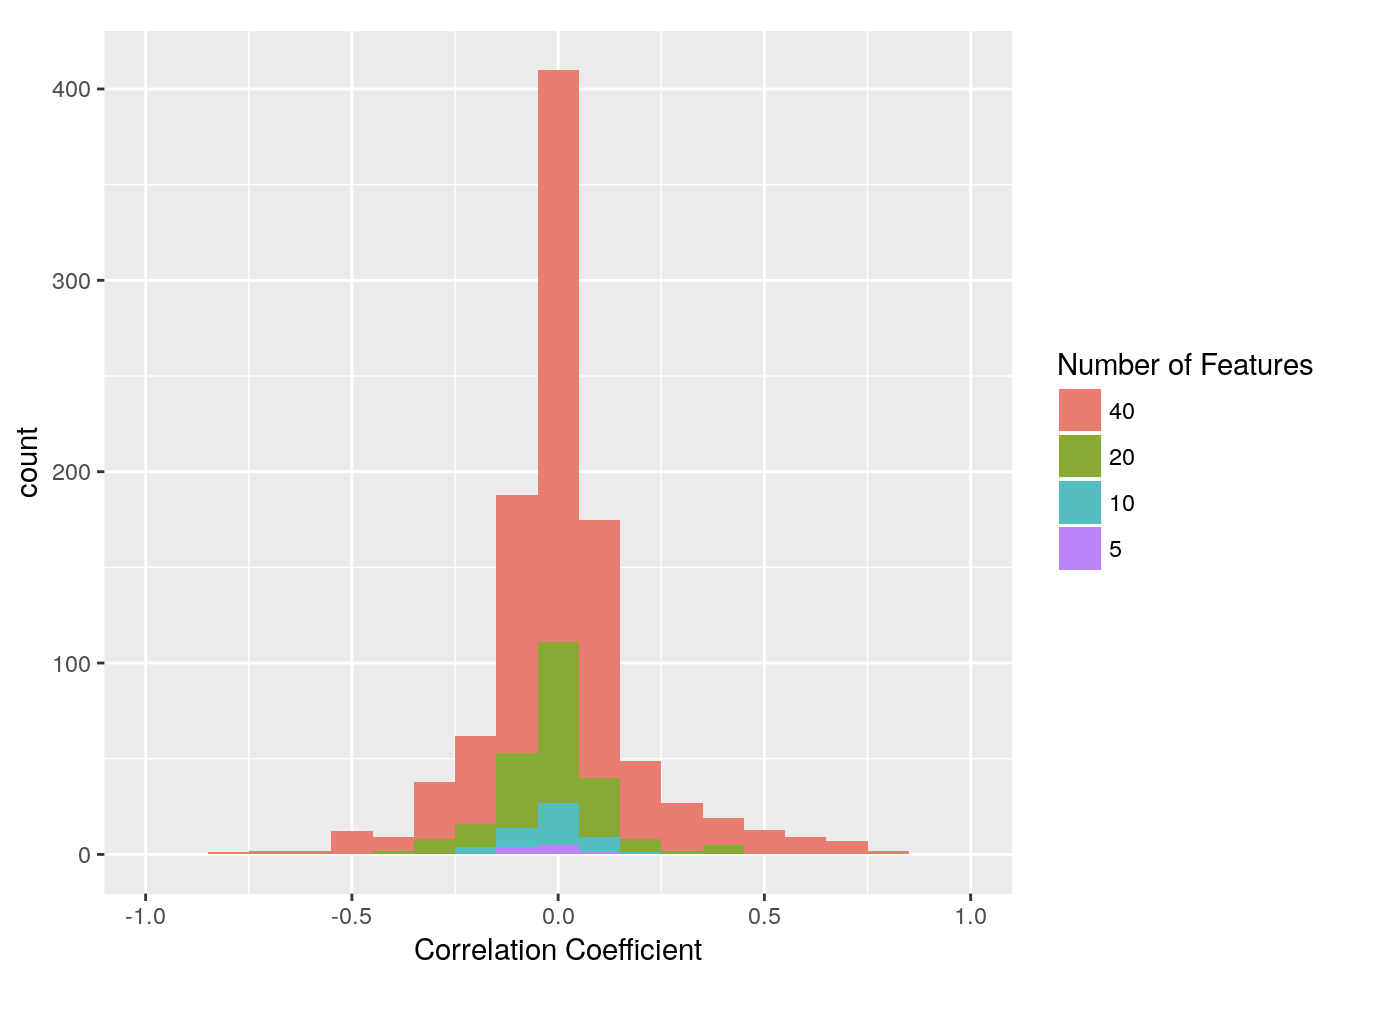

In [31]:
# 높은 correlation을 나타내는 column들을 count해볼 수도 있음.
strong_correlated_idx = [idx for idx, i in enumerate(sorted_corr_total) if abs(i) > 0.5]
strong_correlated_cols = {}
for a, b in sorted_corr_total[strong_correlated_idx].index:
    strong_correlated_cols[a] = strong_correlated_cols[a] + 1 if a in strong_correlated_cols.keys() else 1
    strong_correlated_cols[b] = strong_correlated_cols[b] + 1 if b in strong_correlated_cols.keys() else 1
strong_correlated_cols

{'monthly_lc': 14,
 'monthly_loan': 14,
 'monthly_card_spend': 9,
 'credit_card_payment': 12,
 'mortgage_loan': 12,
 'num_opencard': 10,
 'num_usecard': 11,
 'monthly_bk_loan': 11,
 'credit_card_installments_payment': 12,
 'monthly_cd_loan': 9,
 'monthly_installments_loan': 10,
 'ls_rep_loanb': 9,
 'monthly_insurance_loan': 12,
 'inst_rep_loanb': 13,
 'loan_commitment': 9,
 'credit_loan': 13,
 'avg_score': 9,
 'ages': 11,
 'avg_rat': 9,
 'monthly_sbk_loan': 8,
 'card_usage_ratio': 1}

In [32]:
df_credit.columns

Index(['pop_cd', 'avg_score', 'avg_rat', 'city', 'sex', 'ages', 'population',
       'num_opencard', 'num_usecard', 'monthly_card_spend', 'monthly_lc',
       'monthly_loan', 'monthly_bk_loan', 'monthly_cd_loan',
       'monthly_installments_loan', 'monthly_insurance_loan',
       'monthly_sbk_loan', 'loan_commitment', 'inst_rep_loanb', 'ls_rep_loanb',
       'credit_loan', 'mortgage_loan', 'credit_card_payment',
       'credit_card_installments_payment', 'year_month', 'card_usage_ratio'],
      dtype='object')

In [53]:
[i for i in df_credit.columns if i != 'pop_cd']

['avg_score',
 'avg_rat',
 'city',
 'sex',
 'ages',
 'population',
 'num_opencard',
 'num_usecard',
 'monthly_card_spend',
 'monthly_lc',
 'monthly_loan',
 'monthly_bk_loan',
 'monthly_cd_loan',
 'monthly_installments_loan',
 'monthly_insurance_loan',
 'monthly_sbk_loan',
 'loan_commitment',
 'inst_rep_loanb',
 'ls_rep_loanb',
 'credit_loan',
 'mortgage_loan',
 'credit_card_payment',
 'credit_card_installments_payment',
 'year_month',
 'card_usage_ratio']

In [67]:
def corr_x_y(df,  x_feature, selected_col, title, notshow_cols = ['pop_cd']):
    cols = [i for i in df.columns if i not in notshow_cols]
    corr = df[cols].groupby(x_feature).corr()[selected_col].fillna(0).unstack()
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr.T,  cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title(title)

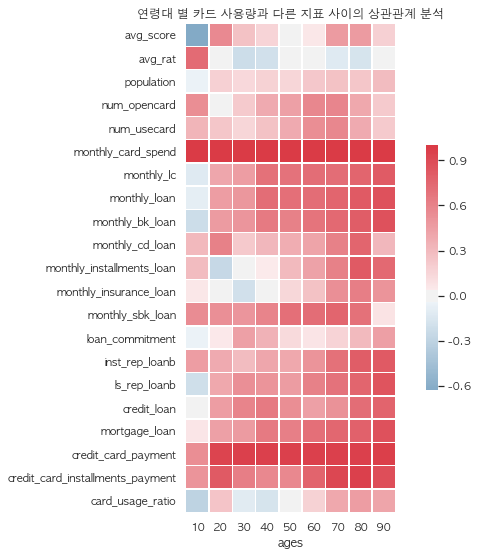

In [68]:
corr_x_y(df_credit, x_feature='ages', 
                    selected_col = 'monthly_card_spend', 
                    title='연령대 별 카드 사용량과 다른 지표 사이의 상관관계 분석')


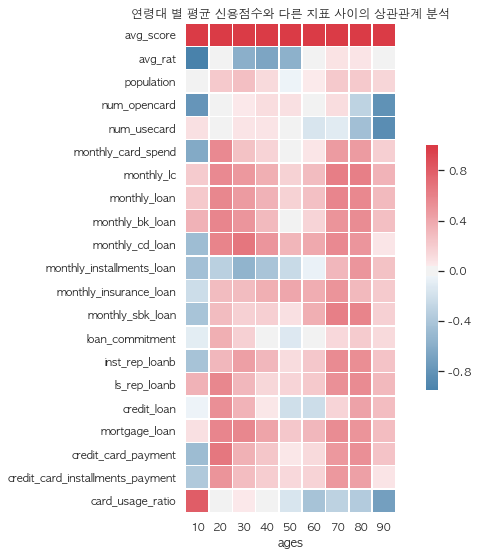

In [69]:
corr_x_y(df_credit, x_feature='ages', 
                    selected_col = 'avg_score', 
                    title='연령대 별 평균 신용점수와 다른 지표 사이의 상관관계 분석')

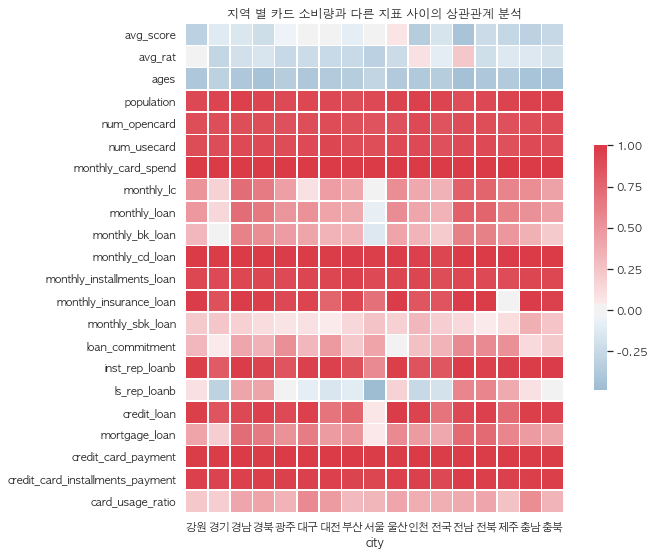

In [71]:
corr_x_y(df_credit, x_feature='city', 
                    selected_col = 'monthly_card_spend', 
                    title='지역 별 카드 소비량과 다른 지표 사이의 상관관계 분석')

- 전체적으로 세분화했을 때 다른 feature들과 매우 상관성이 있음을 보임.
- 카드 소비량을 예측하는 모델을 학습하려 했지만, 서로 상관된 feature들이 너무 많음.
    - PCA로 저차원 압축 -> feature들의 해석이 관건. 전체 feature들의 linear combination이라 잘 될지 모르겠음.
    - 카드 소비량을 기준을 두어 category로 만든 뒤 classifier 문제로 바꿈 -> LDA로 ?
    - 카드 소비량을 그려보니 3개의 gaussian mixture model로 분류할 수 있을 것 같음.
        - 데이터 개수가 많지 않음.
        - 그래도 서로 연관된 feature들을 처리할 해결방안이 아니라 모델 해석을 잘못할 확률 높음

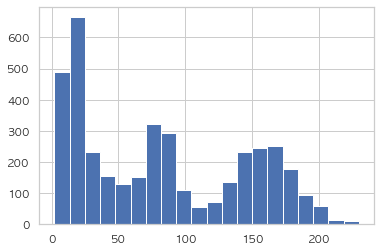

In [74]:
df_credit.monthly_card_spend.hist(bins=20)